# 🔎 Comparaison des résultats 🔎

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
!mkdir data
!wget -P data https://raw.githubusercontent.com/tpazakou/projet_apprentissage_automatique/refs/heads/main/results/results_CNN.csv
!wget -P data https://raw.githubusercontent.com/tpazakou/projet_apprentissage_automatique/refs/heads/main/results/results_biLSTM.csv
!wget -P data https://raw.githubusercontent.com/tpazakou/projet_apprentissage_automatique/refs/heads/main/results/results_classique.csv
!wget -P data https://raw.githubusercontent.com/tpazakou/projet_apprentissage_automatique/refs/heads/main/results/results_transformers_ft.csv
!wget -P data https://raw.githubusercontent.com/tpazakou/projet_apprentissage_automatique/refs/heads/main/results/results_transformers_noft.csv

--2024-12-10 21:44:55--  https://raw.githubusercontent.com/tpazakou/projet_apprentissage_automatique/refs/heads/main/results/results_CNN.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44 [text/plain]
Saving to: ‘data/results_CNN.csv’

results_CNN.csv     100%[===================>]      44  --.-KB/s    in 0s      

2024-12-10 21:44:56 (209 KB/s) - ‘data/results_CNN.csv’ saved [44/44]

--2024-12-10 21:44:56--  https://raw.githubusercontent.com/tpazakou/projet_apprentissage_automatique/refs/heads/main/results/results_biLSTM.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP re

## Création des DataFrames

In [14]:
classique_df = pd.read_csv("data/results_classique.csv", sep = ",")
pourcentage = classique_df * 100

classique_df = pourcentage.applymap(lambda x: f"{x:.2f}")
classique_df

<ipython-input-14-8432074ab2d4>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  classique_df = pourcentage.applymap(lambda x: f"{x:.2f}")


,description,simple,fautes
0,94.74,86.84,74.34


In [10]:
CNN_df = pd.read_csv("data/results_CNN.csv", sep = ",")
CNN_df = CNN_df.rename(columns={'CNN': 'description', 'CNN_simple': 'simple', 'CNN_fautes': 'fautes'})
CNN_df

,description,simple,fautes
0,91.45,83.55,73.68


In [11]:
biLSTM_df = pd.read_csv("data/results_biLSTM.csv", sep = ",")
biLSTM_df = biLSTM_df.rename(columns={'biLSTM': 'description', 'biLSTM_simple': 'simple', 'biLSTM_fautes': 'fautes'})
biLSTM_df

,description,simple,fautes
0,91.45,85.53,73.03


In [6]:
transformers_noft_df = pd.read_csv("data/results_transformers_noft.csv", sep = ",")
transformers_noft_df

,Exactitude
0,0.836066
1,0.877049
2,0.901639


In [7]:
transformers_ft_df = pd.read_csv("data/results_transformers_ft.csv", sep = ",")
transformers_ft_df

,DistilBERT affiné
0,0.598361


In [34]:
comparaison_df = pd.concat([classique_df, CNN_df, biLSTM_df])
comparaison_df = comparaison_df[['description', 'simple', 'fautes']].apply(pd.to_numeric)
comparaison_df["models"] = ['LinearSVC', 'CNN', 'biLSTM']
comparaison_df = comparaison_df[['models', 'description', 'simple', 'fautes']]
comparaison_df

,models,description,simple,fautes
0,LinearSVC,94.74,86.84,74.34
0,CNN,91.45,83.55,73.68
0,biLSTM,91.45,85.53,73.03


## Visualisation des résultats

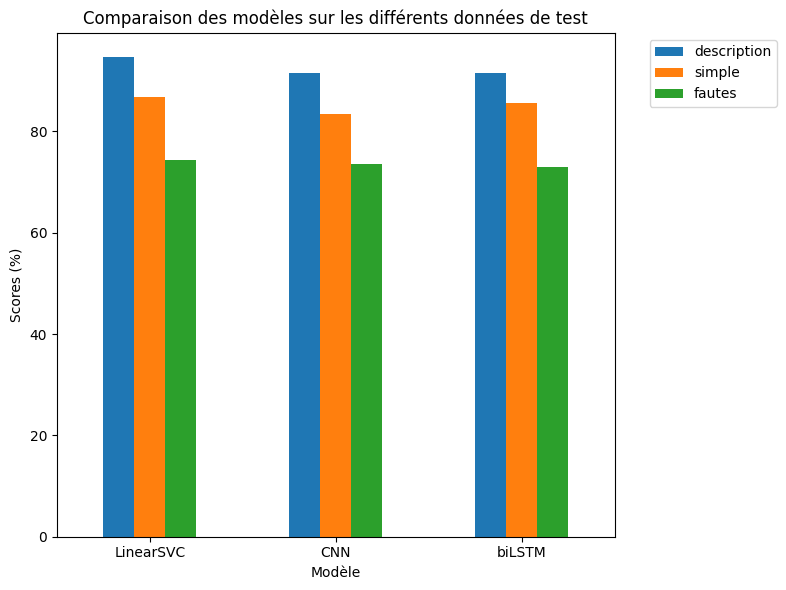

In [35]:
comparaison_df.set_index('models').plot(kind='bar', figsize=(8, 6))

plt.title('Comparaison des modèles sur les différents données de test')
plt.ylabel('Scores (%)')
plt.xlabel('Modèle')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

Par la comparaison de l'exactitude des modèles, on constate que le modèle ayant les meilleures performances est LinearSVC sur les trois types de description, bien qu'il n'y ait pas de grandes différences avec les autres modèles.

Les descriptions avec des fautes sont systématiquement les moins bien classées par tous les algorithmes, ce qui est attendu puisqu'ils ont été entraînés sur des données "standards".

Les performances des transformers ne sont pas véritablement comparables, car elles n'ont pas été obtenues par une validation croisée ni testées sur les différents types de descriptions. Toutefois, leurs performances restent inférieures à celles des autres modèles. LinearSVC a les meilleurs performances avec les plongements contextuels, mais elles restent inférieures à celles obtenues avec les plongements non contextuels :

In [36]:
models = ['DistilBERT affiné', 'LinearSVC', 'Regression logistique', 'Random Forest']
scores = [0.598361, 0.9016393442622951, 0.8770491803278688, 0.8360655737704918]

transformers_df = pd.DataFrame({
    'Model': models,
    'Score': scores
})

transformers_df['Score'] = transformers_df['Score'].apply(lambda x: round(x, 2))

print(transformers_df)

                   Model  Score
0      DistilBERT affiné   0.60
1              LinearSVC   0.90
2  Regression logistique   0.88
3          Random Forest   0.84


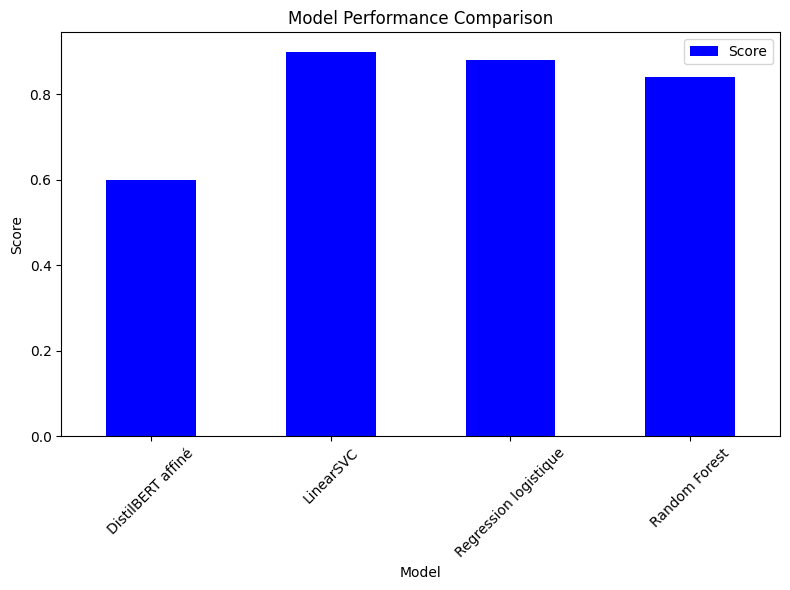

In [39]:
transformers_df.set_index('Model').plot(kind='bar', figsize=(8, 6), color='blue')

plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Perspectives

Le travail n'étant pas éxhaustive, il reste des autres voies à explorer :    

* entraînement sur l'ensemble des données (toutes les trois colonnes) pour un modèle robuste à la variation
* validation croisée à 5 plis pour les transformers
* entraînement sur une autre colonne que `description` afin d'explorer l'impact sur les résultats